---Mehdi Habibi---june2024----

## Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time
import math

## define Current

In [ ]:
def I_creator(type, T, dt, parameters):

    '''
    creates a sequence of values that represents the amount of input current in a form of array.

    Expects:
    T          : Total duration of simulation [ms]
    dt         : Simulation time step [ms]
    type       : a string that identifies the input current function
    parameters : a dictionary that contains required parameters of the current function.

    Returns:
    I_array    : an array of distinct values that represents the input current
    '''

    range_T = np.arange(0, T, dt)
    Lt = (range_T).size

    # 1
    if type == "constant":
        I_array = parameters["value"] * np.ones(Lt)


    # 2
    elif type == "sine_wave":
        I_lst = []
        for step in range(Lt):
            # Compute value of t
            t = step * dt

            current_step_I = 400 * (np.sin(t) + 0.9)
            I_lst.append(current_step_I)
        I_array = np.array(I_lst)


    # 3
    elif type == "step_function":
        step_counter = 0
        change_time = parameters["step_times_lst"][0]
        current_current = parameters["currents_lst"][0]

        I_lst = []
        for time_counter in range(Lt):
            # Compute value of t
            t = time_counter * dt

            if t > change_time:
                change_time = parameters["step_times_lst"][step_counter]
                current_current = parameters["currents_lst"][step_counter]
                step_counter =  step_counter + 1

            current_step_I = current_current
            I_lst.append(current_step_I)

        I_array = np.array(I_lst)


    # 4
    elif type == "linear":
        I_lst = []
        for step in range(Lt):
            # Compute value of t
            t = step * dt

            current_step_I = parameters["constant_multiplier"]*t
            I_lst.append(current_step_I)
        I_array = np.array(I_lst)


    # 5
    elif type == "GWN":
        np.random.seed(seed=parameters['seed'])

        #generate GWN
        I_array =  parameters['sig'] * np.random.randn(Lt) / np.sqrt(dt/1000.)
        I_array = I_array + 250


    return range_T, I_array


## LIF Model

In [ ]:
class LIF:
    def __init__(self, V_th, V_reset, tau_m, g_L, V_init, V_L, tref, T, dt):
        ### typical neuron parameters###
        self.V_th = V_th # spike threshold [mV]
        self.V_reset = V_reset #reset potential [mV]
        self.tau_m = tau_m # membrane time constant [ms]
        self.g_L = g_L #leak conductance [nS]
        self.V_init= V_init # initial potential [mV]
        self.V_L = V_L #leak reversal potential [mV]
        self.tref = tref # refractory time (ms)

        ### simulation parameters ###
        self.T = T # Total duration of simulation [ms]
        self.dt = dt  # Simulation time step [ms]

        self.range_t = np.arange(0, self.T, self.dt) # Vector of discretized time points [ms]

    def run(self, I):
        '''
        Simulate the LIF dynamics with external input current

        Expects:
        I          : input current [pA]. The injected current should be an array

        Returns:
        rec_spikes : spike times
        rec_v      : mebrane potential
        '''

        # Initialize voltage
        Lt = self.range_t.size
        v = np.zeros(Lt)
        v[0] = self.V_init
        tr = 0.


        # simulate the LIF dynamics
        rec_spikes = []               # record spike times
        for it in range(Lt-1):
            if tr > 0:
                v[it] = self.V_reset
                tr = tr-1

            elif v[it] >= self.V_th:         #reset voltage and record spike event
                rec_spikes.append(it)
                v[it] = self.V_reset
                tr = self.tref/self.dt

            #calculate the increment of the membrane potential
            dv = (
                -(v[it]-self.V_L)
                + I[it]/self.g_L
                ) * (self.dt/self.tau_m)

            #update the membrane potential
            v[it+1] = v[it] + dv

        rec_spikes = np.array(rec_spikes) * self.dt

        return v, rec_spikes

    def __repr__(self):
        return "This is object of class LIF"


### Set parameters for LIF Model

class LIF:
                  ( V_th, V_reset, tau_m, g_L, V_init, V_L, tref, T, dt)

In [ ]:
Lif1 = LIF(-55. , -75. , 10. , 10. , -65., -75. , 2. , 400. , .1)

## Define Functions for plot (Voltage-time) ,(f-I)curve , (I-time)

In [ ]:
def membrane_potential_plotter(time_range, voltage):
    plt.plot(time_range, voltage, color = "blue")
    plt.xlim(0, 100)
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.show()

In [ ]:
def current_plotter(time_range, current):
    plt.plot(time_range, current , color = "yellow")
    plt.xlim(0, 100)
    plt.xlabel('Time (ms)')
    plt.ylabel('Input Current (pA)')
    plt.show()

In [ ]:
def frequency_vs_input_plotter(input_current_lst, frequency_of_spikes_lst):
    plt.plot(input_current_lst, frequency_of_spikes_lst, color = "green")
    plt.xlabel('Input Current (pA)')
    plt.ylabel('Frequency (KHz)')
    plt.show()


## Result

### Set parameters for Step Function Current

In [ ]:
step_times_lst = [40, 60, 200, 300, 350, 800]
currents_lst = [100, 150, 400, 490, 520, 600]

In [ ]:
range_T, I_array = I_creator("step_function", 400. , .1, {"step_times_lst":step_times_lst, "currents_lst":currents_lst})
# I_creator(type, T, dt, parameters)

### Showing Results

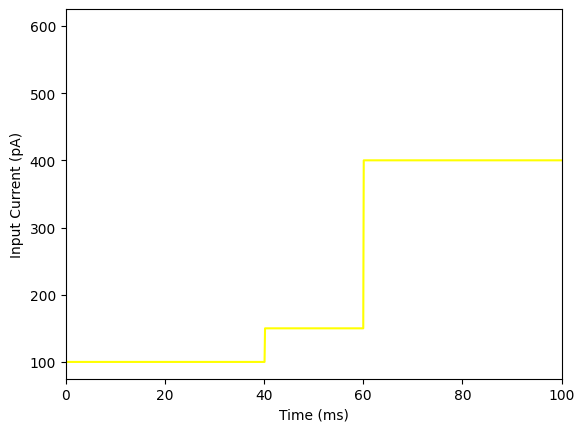

In [ ]:
current_plotter(range_T, I_array)

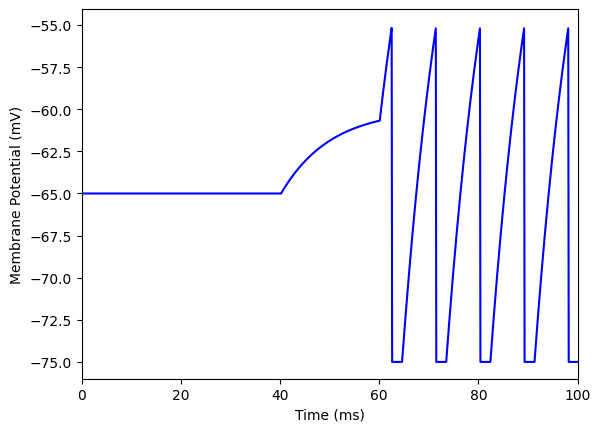

In [ ]:
v, rec_spikes = Lif1.run(I_array)

membrane_potential_plotter(Lif1.range_t, v)

This is object of class LIF


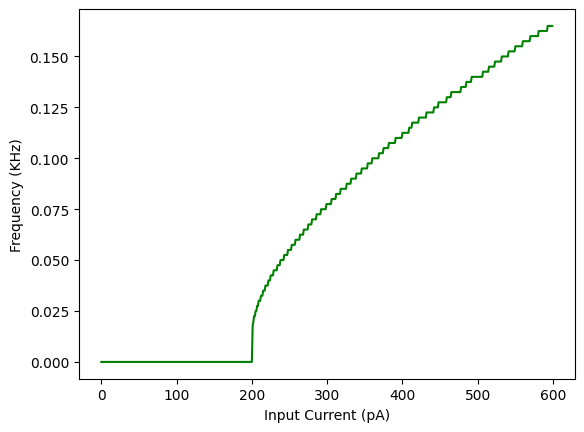

In [ ]:
neurons = [Lif1]

for neuron in neurons:
    print(repr(neuron))
    input_current_lst = []
    frequency_of_spikes_lst = []

    for input_current in range (0, 600):
        input_current_lst.append(input_current)
        range_T, I_array = I_creator("constant", 400. , .1, {"value":input_current})
        rec_spikes = neuron.run(I_array)[1]
        frequency_of_spikes_lst.append(len(rec_spikes)/neuron.T)

    frequency_vs_input_plotter(input_current_lst, frequency_of_spikes_lst)